# TELECOM CUSTOMER CHURN & USAGE ANALYSIS

In [32]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Load the dataset
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


#Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




---



# Basic Info and Datatypes







In [34]:
#general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
#Check for nulls
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [36]:
#Stats for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




---



# **Cleaning the Data**

In [37]:
#Convert 'TotalCharges' to numeric datatype.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [38]:
#Check nulls
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [39]:
#Dropping rows where 'TotalCharges' is null.
df=df.dropna(subset=['TotalCharges'])

In [40]:
#Resetting the index after dropping the nulls.
df.reset_index(drop=True,inplace=True)



---



# **Feature Engineering**

In [41]:
#Categorising 'tenure' into buckets.
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 yr','1-2 yrs', '2-4 yrs','4-5 yrs','5-6 yrs',])

/tmp/ipython-input-41-3242412202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 yr','1-2 yrs', '2-4 yrs','4-5 yrs','5-6 yrs',])


In [42]:
#Categorising 'MonthlyCharges' into buckets.
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

churn_rate = df.groupby('ChargeGroup')['Churn'].value_counts(normalize=True).unstack()
print(churn_rate)

Churn              No       Yes
ChargeGroup                    
Low          0.883188  0.116812
Medium       0.760346  0.239654
High         0.621501  0.378499


/tmp/ipython-input-42-1934389772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargeGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])
/tmp/ipython-input-42-1934389772.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('ChargeGroup')['Churn'].value_counts(normalize=True).unstack()


In [43]:
#Converting 'SeniorCitizen' to Yes/No
df['SeniorCitizen']= df['SeniorCitizen'].replace({0:'No',1:'Yes'})
df['SeniorCitizen'].head()

/tmp/ipython-input-43-4282651562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen']= df['SeniorCitizen'].replace({0:'No',1:'Yes'})


,SeniorCitizen
0,No
1,No
2,No
3,No
4,No


In [44]:
#Counting the total number of Services provided.
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServicesCount'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)
df['ServicesCount']


,ServicesCount
0,1
1,3
2,3
3,3
4,1
...,...
7027,7
7028,6
7029,1
7030,2




---




# Exploratory Data Analysis (EDA):



### 1. Churn Distrubution

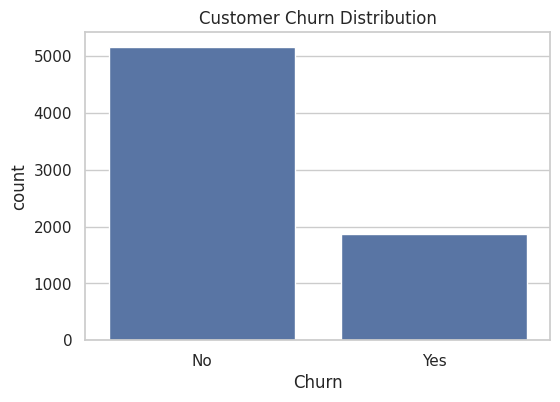

In [45]:
#set plot style
sns.set(style='whitegrid')

#churn count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=df)
plt.title('Customer Churn Distribution')
plt.show()

### 2. Churn by Demographics




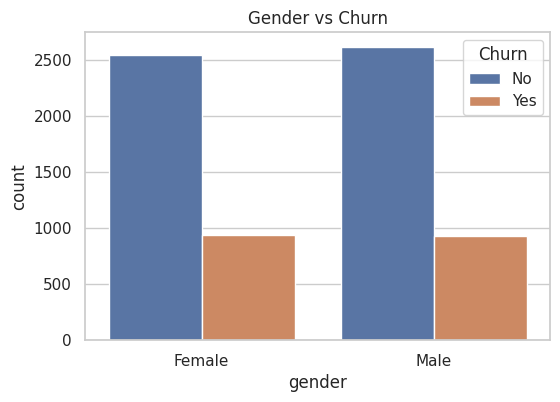

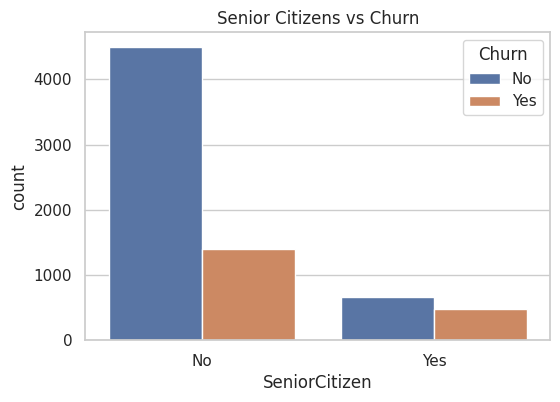

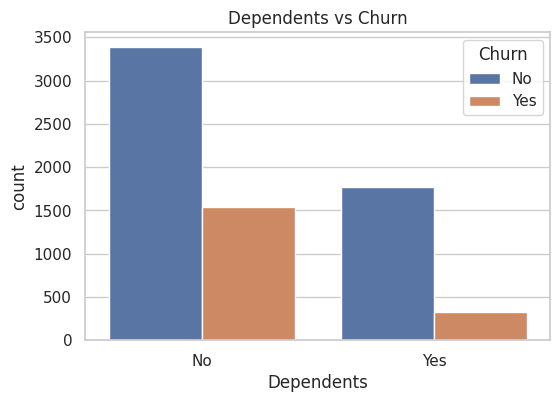

In [46]:
#Gender vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()


#Senior citizen vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizens vs Churn')
plt.show()


#Dependents
plt.figure(figsize=(6,4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Dependents vs Churn')
plt.show()

### 3. Churn by Services Subscribed

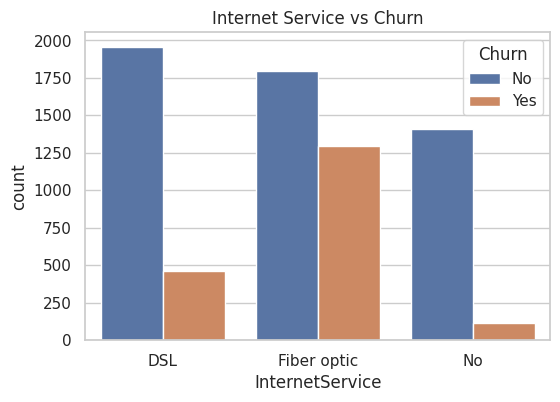

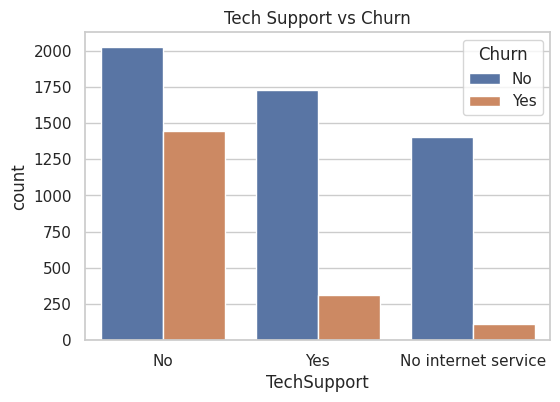

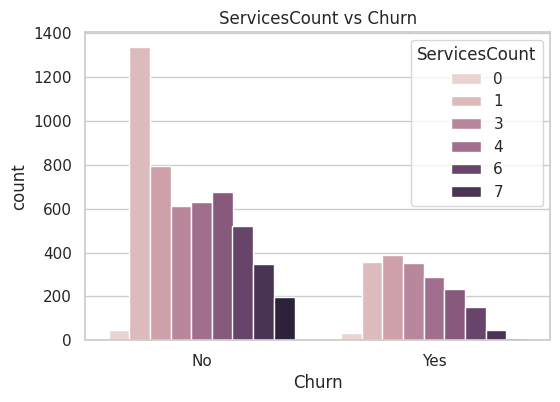

In [47]:
#Internet Service vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service vs Churn')
plt.show()

#Tech Support vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Tech Support vs Churn')
plt.show()

#Number of Services vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='ServicesCount', data=df)
plt.title('ServicesCount vs Churn')
plt.show()

### 4. Churn by Contract/Payment Method

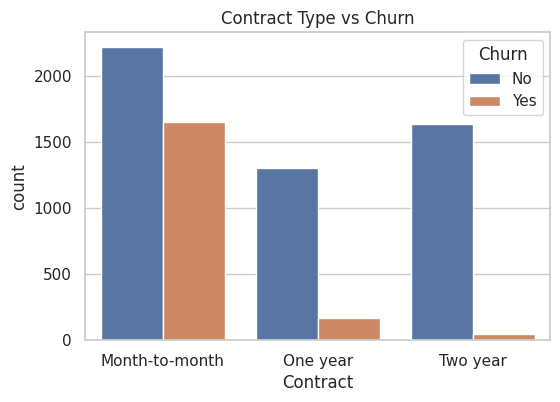

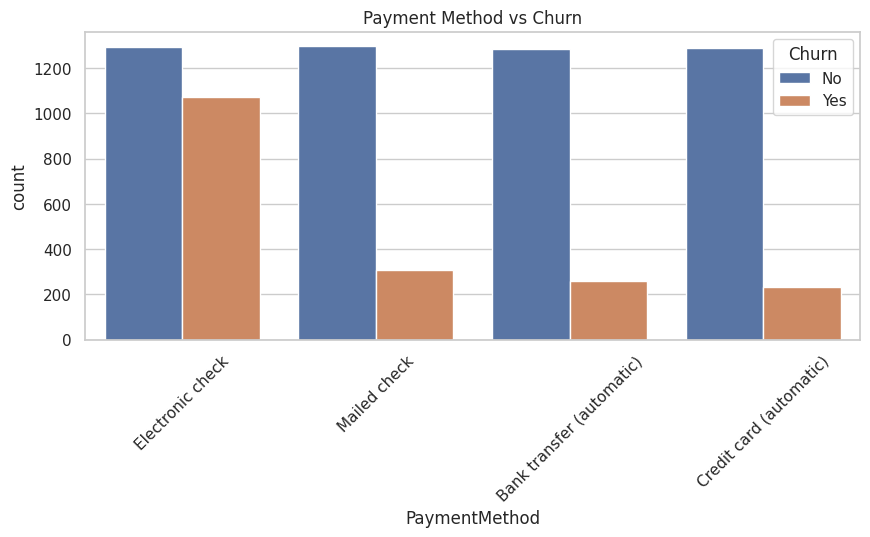

In [48]:
#Contract type vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()

#Payment method vs Churn
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.show()

### 5. Churn by Revenue & Usage Behaviour

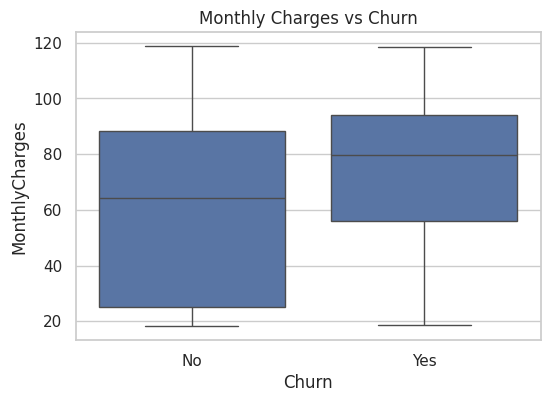

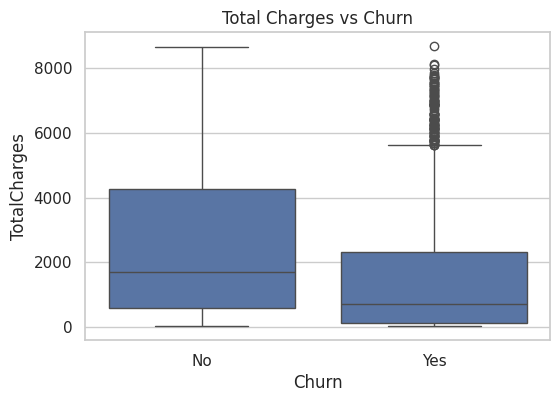

In [49]:
#Churn by Monthly Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

#Churn by Total Charges
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()



---



# CHURN ANALYSIS & INSIGHT GENERATION

### 1. Churn Rate by Contract Type

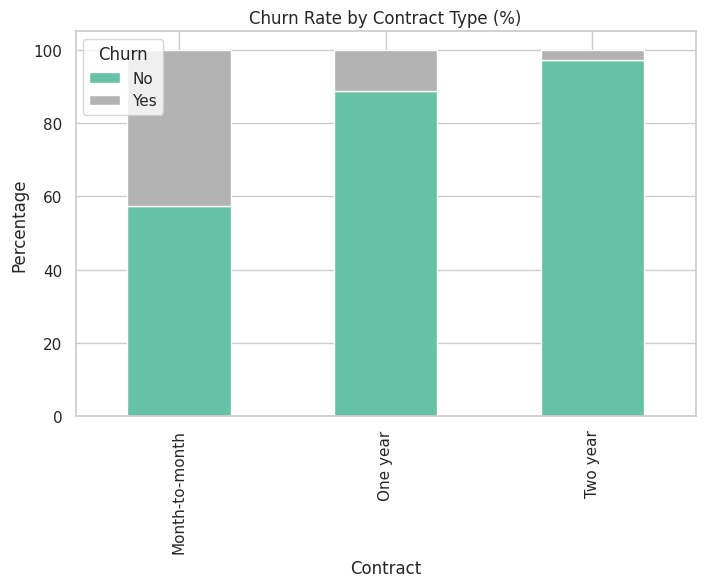

In [50]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Churn Rate by Contract Type (%)')
plt.ylabel('Percentage')
plt.show()

### 2. Churn by Internet Service Type

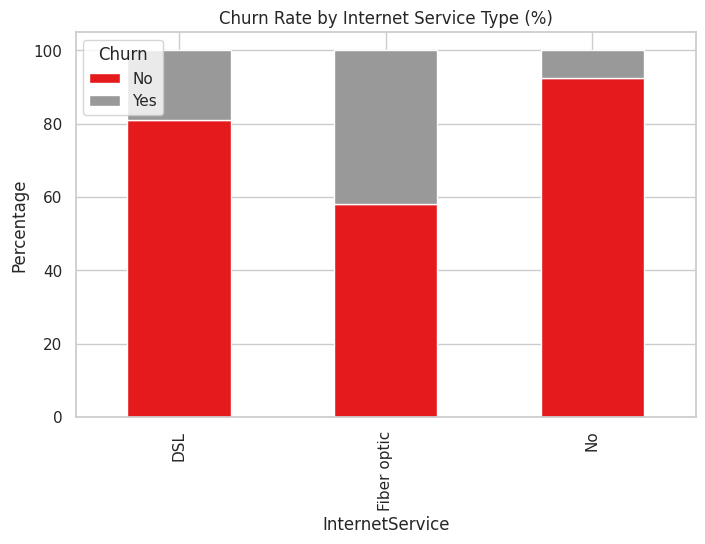

In [51]:
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
internet_churn.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set1')
plt.title('Churn Rate by Internet Service Type (%)')
plt.ylabel('Percentage')
plt.show()

### 3. Churn by Customer Tenure Group

/tmp/ipython-input-52-3851976925.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100


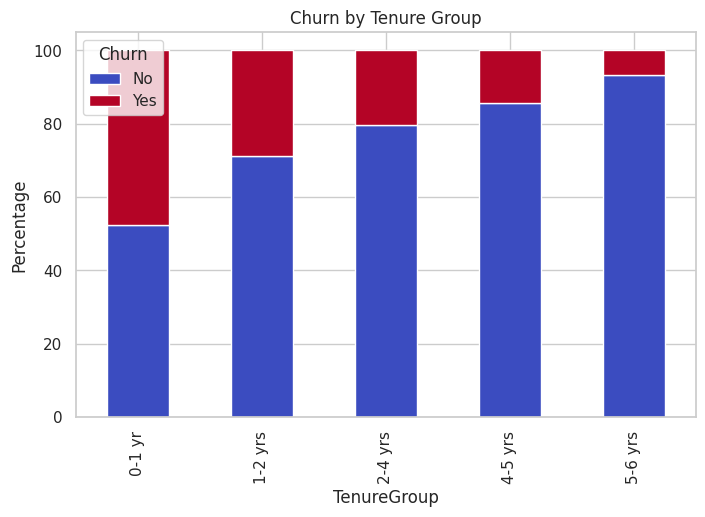

In [52]:
tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100
tenure_churn.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title('Churn by Tenure Group')
plt.ylabel('Percentage')
plt.show()

## 4. Churn vs Monthly Charges bin

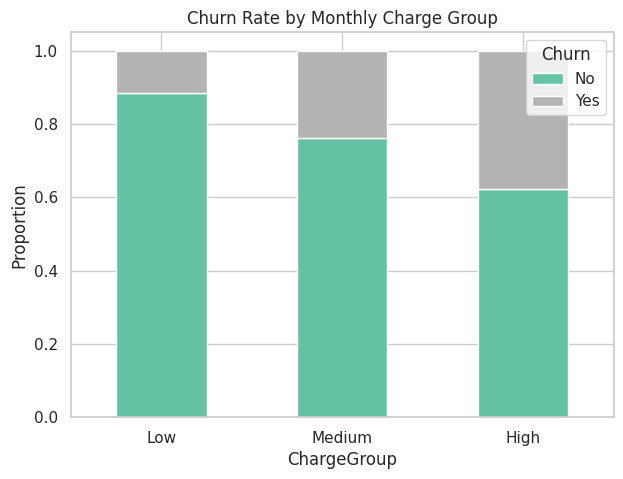

In [53]:
churn_rate.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')
plt.title('Churn Rate by Monthly Charge Group')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

### 5. Churn vs Number of Services Subscribed

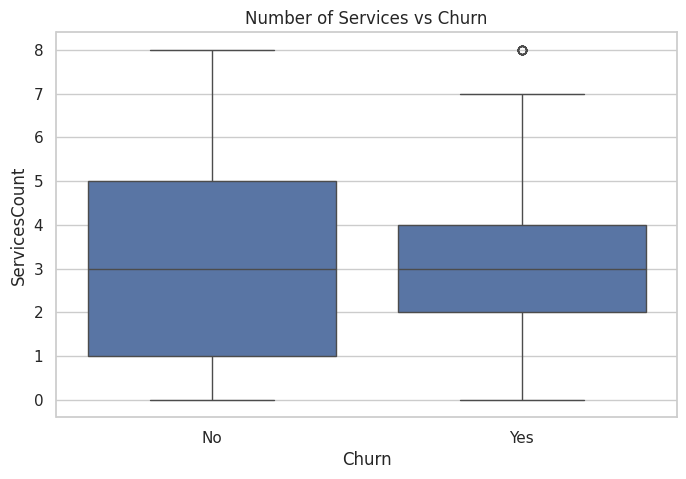

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='ServicesCount', data=df)
plt.title('Number of Services vs Churn')
plt.show()



---





In [55]:
#Exporting dataframe to CSV File
df.to_csv("telecom_churn_cleaned.csv", index='False')

In [56]:
from google.colab import files
files.download("telecom_churn_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>